In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline #  그래프를 주피터 노트북에서 바로 그림

UsageError: unrecognized arguments: # 그래프를 주피터 노트북에서 바로 그림


In [2]:
DATA_IN_PATH = './data/' #데이터가 저장된 경로
train_data = pd.read_csv(DATA_IN_PATH + 'labeledTrainData.tsv', header=0, delimiter='\t', quoting=3)
# delimiter = 사용할 데이터는 탭으로 구분되어 있기 때문
# header = 0 데이터에 각 항복명이 포함되어 있기 때문에
# quoting = 3 ""를 무시하기 위해
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


## 데이터의 크기와 개수

In [10]:
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH): # os 라이브러리를 사용해 해당 경로의 파일 목록을 가져온다.
    if 'tsv' in file and 'zip' not in file: # zip 파일이 아닌 파일들 중에서
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) +'MB')
        # ljust() : 왼쪽 정렬
        # os.path.getsize(파일경로) : 파일 크기
print('전체 학습 데이터의 개수 : {}개'.format(len(train_data)))

파일 크기 : 
labeledTrainData.tsv          33.56MB
testData.tsv                  32.72MB
unlabeledTrainData.tsv        67.28MB
전체 학습 데이터의 개수 : 25000개


## 데이터의 문자 길이 분포

In [12]:
train_length = train_data['review'].apply(len) # 각 리뷰의 길이
train_length.head()

0    2304
1     948
2    2451
3    2247
4    2233
Name: review, dtype: int64

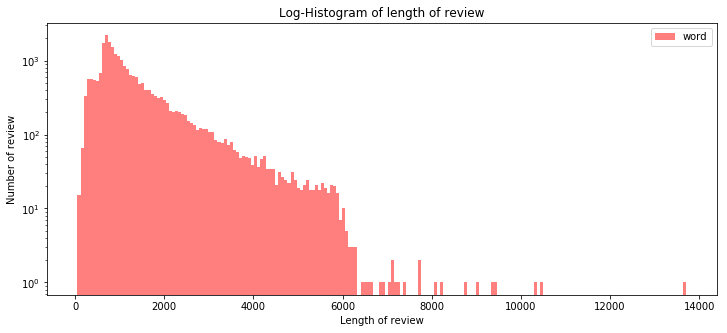

In [14]:
plt.figure(figsize=(12,5))
# 그래프에 대한 이미지 크기 선언

plt.hist(train_lenght, bins=200, alpha=0.5, color='r', label='word')
# 히스토그램 선언(데이터, 히스토그램 값에 대한 버킷 범위, 투명도, 색상, 그래프에 대한 라벨)
plt.yscale('log', nonposy='clip')
# y축 값을 log 값을 가지도록 설정
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')
plt.legend()
plt.show()

In [17]:
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최댓값: 13710
리뷰 길이 최솟값: 54
리뷰 길이 평균값: 1329.71
리뷰 길이 표준편차: 1005.22
리뷰 길이 중간값: 983.0
리뷰 길이 제1사분위: 705.0
리뷰 길이 제3사분위: 1619.0


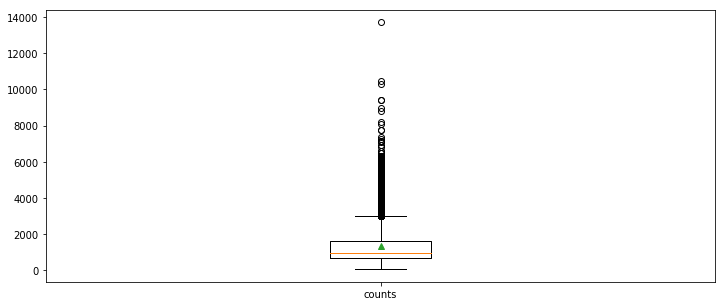

In [19]:
plt.figure(figsize=(12,5))

plt.boxplot(train_length, labels=['counts'], showmeans=True)
# 박스플롯 생성(데이터, 데이터에 대한 라벨, 평균값 마크)
plt.show()

# 박스플롯 해석
# 박스             : 제 1사분위 ~ 제 3사분위, 중간값, 평균값
# 박스와 연결된 선 : 제 1사분위로부터 3/2 지점, 제 3사분위로부터 3/2 지점
# 박스 이외의 점   : 특이점

## 워드 클라우드

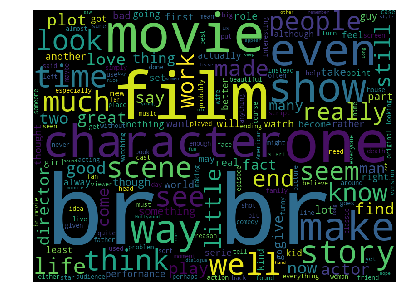

In [22]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_data['review']))
plt.figure(figsize=(12,5))
plt.imshow(cloud)
plt.axis('off')
plt.show()

br은 HTML 태그 중 하나로, 해당 데이터가 정제되지 않은 데이터임.
이후 전처리 작업에서 이 태그들을 모두 제거.

## 각 라벨의 분포

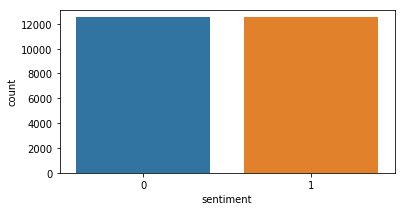

In [25]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6,3)
sns.countplot(train_data['sentiment'])
plt.show()

In [26]:
print('긍정 리뷰 개수: {}개'.format(train_data['sentiment'].value_counts()[1]))
print('부정 리뷰 개수: {}개'.format(train_data['sentiment'].value_counts()[0]))
#데이터의 분포를 확인하여 불균형 데이터의 경우 전처리가 필요함.

긍정 리뷰 개수: 12500개
부정 리뷰 개수: 12500개


## 리뷰당 단어 개수에 대한 히스토그램

In [28]:
train_word_counts = train_data['review'].apply(lambda x:len(x.split(' ')))
# 띄어쓰기 기준으로 하나의 단어로 생각하고 계산.

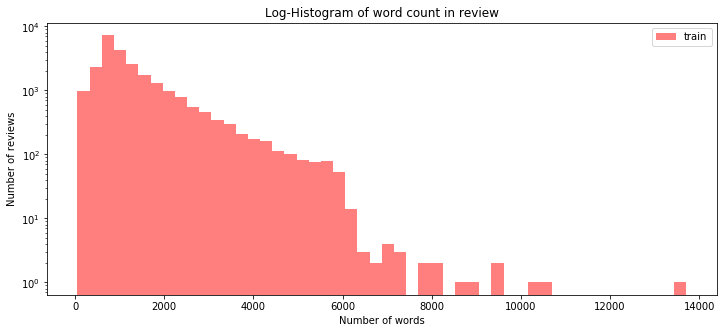

In [31]:
plt.figure(figsize=(12,5))
# 그래프에 대한 이미지 크기 선언

plt.hist(train_lenght, bins=50, alpha=0.5, color='r', label='train')
# 히스토그램 선언(데이터, 히스토그램 값에 대한 버킷 범위, 투명도, 색상, 그래프에 대한 라벨)
plt.yscale('log', nonposy='clip')
# y축 값을 log 값을 가지도록 설정
plt.title('Log-Histogram of word count in review')
plt.xlabel('Number of words')
plt.ylabel('Number of reviews')
plt.legend()
plt.show()

In [32]:
print('리뷰 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
print('리뷰 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최대 값: 2470
리뷰 단어 개수 최소 값: 10
리뷰 단어 개수 평균 값: 233.79
리뷰 단어 개수 표준편차: 173.74
리뷰 단어 개수 중간 값: 174.0
리뷰 단어 개수 제 1 사분위: 127.0
리뷰 단어 개수 제 3 사분위: 284.0


## 대소문자와 구두점 비율 확인

In [33]:
qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x)) # 물음표가 구두점으로 쓰임
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x)) # 마침표
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper())) #  첫번째 대문자
capitals = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
                  
print('물음표가있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))
print('첫 글자가 대문자 인 질문: {:.2f}%'.format(capital_first * 100))
print('대문자가있는 질문: {:.2f}%'.format(capitals * 100))
print('숫자가있는 질문: {:.2f}%'.format(numbers * 100))

물음표가있는 질문: 29.55%
마침표가 있는 질문: 99.69%
첫 글자가 대문자 인 질문: 0.00%
대문자가있는 질문: 99.59%
숫자가있는 질문: 56.66%


In [34]:
# 전처리 과정에서 소문자로 전부 변경, 구두점의 경우 제거